
# Alberta Wildfires: causes, characteristics and patterns (2006-2023)


### Data 601- Winter 2025: Final project

Authors:  Yilin Wan, Riya Chevli, Deepika Gollamandala

Date: 11 February, 2025
   

## Introduction


Wildfires naturally occur in many ecosystems and play an important role in helping forests and grasslands regenerate by removing old plants. However, they can become harmful when they occur close to populated areas, where they can destroy homes, businesses, and even lead to injuries or loss of life. We chose to study wildfires because they are a complex issue with over arching and lasting impacts across the environment, ecology and economy of communities especially in this part of the world as seen in the recent fires in California as well. News reports highlight that 2023 has been an especially severe year for wildfires in Canada. Recently, there has been a noticeable rise in both the frequency and intensity of these fires. We aim to explore the underlying causes driving this trend.

Alberta is no stranger to wildfires - the latest one being the devastating wildfire seen in Jasper in summer of 2024 in which about 30% of the tourist town got destroyed by fire. Studying wildfires, their patterns, causes and characteristics helps us to understand them and find ways to prevent and mitigate them, keep communities safe and protect the environment.

In this analysis, we also compare the wildfire patterns across three distinct periods—Pre-COVID, COVID, and Post-COVID. 

## Guilding questions

To thoroughly understand wildfires in Alberta, we formulated the following guiding questions. The insights gathered will contribute to the development of effective wildfire management strategies.

1. What are the primary causes for wildfires in Alberta?
2. Any differences in characteristics of wildfires started by natural causes vs. human activity?​
3. During which months are fires most frequent?
4. How do weather conditions affect the size and spread of wildfires?
5. ​How does the type of trees affect the size and spread?
6. Any observable trends in the frequency or size of wildfires in Alberta over the years?

## Dataset

- Dataset: Historical wildfire data : 2006 to 2023  
- Source: https://open.alberta.ca/opendata/wildfire-data
- Direct Link: https://open.alberta.ca/dataset/a221e7a0-4f46-4be7-9c5a-e29de9a3447e/resource/80480824-0c50-456c-9723-f9d4fc136141/download/fp-historical-wildfire-data-2006-2023.xlsx
- Permissions: Open data, readily available, no permissions were required
- Format: Structured and tabular (excel)
- Size:~25000 rows and 50 variables
- Variables: a description of the variables of the dataset is available at https://open.alberta.ca/dataset/a221e7a0-4f46-4be7-9c5a-e29de9a3447e/resource/1b635b8b-a937-4be4-857e-8aeef77365d2/download/fp-historical-wildfire-data-dictionary-2006-2023.pdf
- Tools Used: Python, Jupyter notebook , matplotlib , seaborn , plotly


## Loading the required libraries

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from sklearn.impute import KNNImputer



In [2]:
# First we read our csv file using read_csv function and after that showing first 5 rows using head function

df = pd.read_csv('fp-historical-wildfire-data-2006-2023.csv')
df.head()

,fire_year,fire_number,fire_name,current_size,size_class,fire_location_latitude,fire_location_longitude,fire_origin,general_cause_desc,industry_identifier_desc,...,distance_from_water_source,first_bucket_drop_date,bh_fs_date,bh_hectares,uc_fs_date,uc_hectares,to_fs_date,to_hectares,ex_fs_date,ex_hectares
0,2006,PWF001,NaN,0.10,A,56.249956,-117.181960,Private Land,Resident,NaN,...,NaN,NaN,2006-04-02 22:00:00,0.01,2006-04-02 22:00:00,0.01,NaN,NaN,2006-04-03 10:20:00,0.10
1,2006,EWF002,NaN,0.20,B,53.606367,-115.915733,Provincial Land,Incendiary,NaN,...,NaN,NaN,2006-04-03 13:20:00,0.20,2006-04-03 13:20:00,0.20,NaN,NaN,2006-04-03 14:00:00,0.20
2,2006,EWF001,NaN,0.50,B,53.610933,-115.594267,Provincial Land,Incendiary,NaN,...,NaN,NaN,2006-04-03 13:23:00,0.50,2006-04-03 13:23:00,0.50,NaN,NaN,2006-04-03 15:00:00,0.50
3,2006,EWF003,NaN,0.01,A,53.608867,-115.609467,Provincial Land,Incendiary,NaN,...,NaN,NaN,2006-04-03 14:08:00,0.01,2006-04-03 14:08:00,0.01,NaN,NaN,2006-04-03 15:05:00,0.01
4,2006,PWF002,NaN,0.10,A,56.249956,-117.050249,Provincial Land,Other Industry,Waste Disposal,...,NaN,NaN,2006-04-03 19:57:00,0.10,2006-04-03 20:19:00,0.10,2006-04-03 20:20:00,0.1,2006-04-05 10:18:00,0.10


## Data Cleaning

#### Selecting the required columns. 
Here in this dataset we only use below selected columns to perform data analysis:

In [3]:

df= df[['fire_year','fire_number', 'current_size', 'size_class',
       'general_cause_desc', 'industry_identifier_desc',
       'responsible_group_desc', 'activity_class', 
       'fire_start_date', 'fire_spread_rate',
       'fire_type', 'weather_conditions_over_fire',
       'temperature', 'relative_humidity', 'wind_speed','fire_location_latitude','fire_location_longitude','fuel_type','ex_hectares']]
df.head()
    

,fire_year,fire_number,current_size,size_class,general_cause_desc,industry_identifier_desc,responsible_group_desc,activity_class,fire_start_date,fire_spread_rate,fire_type,weather_conditions_over_fire,temperature,relative_humidity,wind_speed,fire_location_latitude,fire_location_longitude,fuel_type,ex_hectares
0,2006,PWF001,0.10,A,Resident,NaN,Resident,Grass,2006-04-02 12:00:00,0.0,Surface,Clear,18.0,10.0,2.0,56.249956,-117.181960,O1a,0.10
1,2006,EWF002,0.20,B,Incendiary,NaN,Others (explain in remarks),Lighting Fires,2006-04-03 12:10:00,0.0,Surface,Clear,12.0,22.0,10.0,53.606367,-115.915733,O1a,0.20
2,2006,EWF001,0.50,B,Incendiary,NaN,Others (explain in remarks),Lighting Fires,2006-04-03 12:15:00,0.0,Surface,Clear,12.0,22.0,10.0,53.610933,-115.594267,O1a,0.50
3,2006,EWF003,0.01,A,Incendiary,NaN,Others (explain in remarks),Lighting Fires,2006-04-03 12:10:00,0.0,Surface,Clear,12.0,22.0,10.0,53.608867,-115.609467,O1b,0.01
4,2006,PWF002,0.10,A,Other Industry,Waste Disposal,Employees,Refuse,2006-04-03 17:00:00,0.1,Surface,Clear,6.0,37.0,2.0,56.249956,-117.050249,NaN,0.10


Here we check duplicated rows in dataset :

In [4]:

print('The number of duplicated rows in the dataframe: ')
df.duplicated().sum()


The number of duplicated rows in the dataframe: 


0

### Exploring data : 

Here we describe data shape , which type of dataset and percentage missing value in dataset  

In [4]:
print("Shape:", df.shape, '\n')
print("Columns:\n", df.columns.tolist())

print('\n')
print("Data types of each column:\n", df.dtypes)

print('\n')
percentage_value=df.isna().mean()*100
print("Percentage of missing data per column:\n", percentage_value)


Shape: (25321, 19) 

Columns:
 ['fire_year', 'fire_number', 'current_size', 'size_class', 'general_cause_desc', 'industry_identifier_desc', 'responsible_group_desc', 'activity_class', 'fire_start_date', 'fire_spread_rate', 'fire_type', 'weather_conditions_over_fire', 'temperature', 'relative_humidity', 'wind_speed', 'fire_location_latitude', 'fire_location_longitude', 'fuel_type', 'ex_hectares']


Data types of each column:
 fire_year                         int64
fire_number                      object
current_size                    float64
size_class                       object
general_cause_desc               object
industry_identifier_desc         object
responsible_group_desc           object
activity_class                   object
fire_start_date                  object
fire_spread_rate                float64
fire_type                        object
weather_conditions_over_fire     object
temperature                     float64
relative_humidity               float64
wind_speed 

### Handling Missing value :

- We dropped the columns and rows that had more than 35% missing values.
- Here, We decided not to handle outliers as we wanted to also study the causes and characteristics of extreme fires.we fill in the missing values using the K-Nearest Neighbors (KNN) algorithm, as discussed in class.
- First, we separate the numeric and categorical columns. The missing values in numeric columns are imputed using the KNN algorithm, while those in categorical columns are replaced with the most frequent value.

In [5]:
df = df.drop(percentage_value[percentage_value>35].index,axis=1)
display(df)

,fire_year,fire_number,current_size,size_class,general_cause_desc,fire_start_date,fire_spread_rate,fire_type,weather_conditions_over_fire,temperature,relative_humidity,wind_speed,fire_location_latitude,fire_location_longitude,fuel_type,ex_hectares
0,2006,PWF001,0.10,A,Resident,2006-04-02 12:00:00,0.0,Surface,Clear,18.0,10.0,2.0,56.249956,-117.181960,O1a,0.10
1,2006,EWF002,0.20,B,Incendiary,2006-04-03 12:10:00,0.0,Surface,Clear,12.0,22.0,10.0,53.606367,-115.915733,O1a,0.20
2,2006,EWF001,0.50,B,Incendiary,2006-04-03 12:15:00,0.0,Surface,Clear,12.0,22.0,10.0,53.610933,-115.594267,O1a,0.50
3,2006,EWF003,0.01,A,Incendiary,2006-04-03 12:10:00,0.0,Surface,Clear,12.0,22.0,10.0,53.608867,-115.609467,O1b,0.01
4,2006,PWF002,0.10,A,Other Industry,2006-04-03 17:00:00,0.1,Surface,Clear,6.0,37.0,2.0,56.249956,-117.050249,NaN,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25316,2023,PWF016,0.41,B,Resident,2023-04-27 15:30:00,0.5,Surface,Clear,15.0,46.0,10.0,56.456850,-116.077467,O1a,0.41
25317,2023,SWF055,0.10,A,Power Line Industry,2023-05-03 10:35:00,0.0,Surface,Clear,23.0,28.0,15.0,54.966217,-115.570850,O1a,0.10
25318,2023,GWF031,0.30,B,Lightning,2023-05-21 19:43:00,1.0,Ground,Cloudy,16.0,45.0,10.0,55.350571,-117.119320,NaN,0.30
25319,2023,PWF128,0.01,A,Recreation,2023-08-02 12:00:00,0.0,Surface,Cloudy,21.0,63.0,4.0,56.177685,-116.799293,NaN,0.01


In [6]:
df['fire_start_date'].mode().values
df['fire_start_date'][df['fire_start_date'] == df['fire_start_date'].mode()[0] ]

df['fire_start_date'] = pd.to_datetime(df['fire_start_date'], errors='coerce')

In [8]:
numericcol = df.select_dtypes(include=['float64', 'int64']).columns
categoricalcol = df.select_dtypes(include=['object']).columns

imputer = KNNImputer(n_neighbors=2)
df[numericcol] = imputer.fit_transform(df[numericcol])

for col in categoricalcol:
    df[col].fillna(df[col].mode()[0], inplace=True)
display(df)


,fire_year,fire_number,current_size,size_class,general_cause_desc,fire_start_date,fire_spread_rate,fire_type,weather_conditions_over_fire,temperature,relative_humidity,wind_speed,fire_location_latitude,fire_location_longitude,fuel_type,ex_hectares
0,2006.0,PWF001,0.10,A,Resident,2006-04-02 12:00:00,0.0,Surface,Clear,18.0,10.0,2.0,56.249956,-117.181960,O1a,0.10
1,2006.0,EWF002,0.20,B,Incendiary,2006-04-03 12:10:00,0.0,Surface,Clear,12.0,22.0,10.0,53.606367,-115.915733,O1a,0.20
2,2006.0,EWF001,0.50,B,Incendiary,2006-04-03 12:15:00,0.0,Surface,Clear,12.0,22.0,10.0,53.610933,-115.594267,O1a,0.50
3,2006.0,EWF003,0.01,A,Incendiary,2006-04-03 12:10:00,0.0,Surface,Clear,12.0,22.0,10.0,53.608867,-115.609467,O1b,0.01
4,2006.0,PWF002,0.10,A,Other Industry,2006-04-03 17:00:00,0.1,Surface,Clear,6.0,37.0,2.0,56.249956,-117.050249,C2,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25316,2023.0,PWF016,0.41,B,Resident,2023-04-27 15:30:00,0.5,Surface,Clear,15.0,46.0,10.0,56.456850,-116.077467,O1a,0.41
25317,2023.0,SWF055,0.10,A,Power Line Industry,2023-05-03 10:35:00,0.0,Surface,Clear,23.0,28.0,15.0,54.966217,-115.570850,O1a,0.10
25318,2023.0,GWF031,0.30,B,Lightning,2023-05-21 19:43:00,1.0,Ground,Cloudy,16.0,45.0,10.0,55.350571,-117.119320,C2,0.30
25319,2023.0,PWF128,0.01,A,Recreation,2023-08-02 12:00:00,0.0,Surface,Cloudy,21.0,63.0,4.0,56.177685,-116.799293,C2,0.01


In [9]:
df2 = pd.read_csv("Historical_Air_Quality_20250130.csv")  

df['fire_start_date'] = pd.to_datetime(df['fire_start_date'], errors="coerce")
df2['Date'] = pd.to_datetime(df2['Date'], errors="coerce")
merged_df = pd.merge(
    df,  
    df2,  
    left_on="fire_start_date", 
    right_on="Date",  
    how="inner" 
)    
merged_df = merged_df.drop(columns=["Date"])
merged_df.to_csv("merged_file.csv", index=False)
print(merged_df.head())
df1 = pd.read_csv('merged_file.csv')

   fire_year fire_number  current_size size_class general_cause_desc  \
0     2006.0      RWF170          0.05          A          Lightning   
1     2006.0      RWF170          0.05          A          Lightning   
2     2006.0      RWF170          0.05          A          Lightning   
3     2006.0      RWF170          0.05          A          Lightning   
4     2006.0      RWF170          0.05          A          Lightning   

  fire_start_date  fire_spread_rate fire_type weather_conditions_over_fire  \
0      2006-07-30               0.0   Surface                       Cloudy   
1      2006-07-30               0.0   Surface                       Cloudy   
2      2006-07-30               0.0   Surface                       Cloudy   
3      2006-07-30               0.0   Surface                       Cloudy   
4      2006-07-30               0.0   Surface                       Cloudy   

   temperature  ...  fuel_type  ex_hectares       Station Name      Method  \
0         10.0  ... 

### Data transformation

- We extracted the new column "month" , from the column "fire_start_date". The new column gives the month in which fire started. 

- We replaced/ renamed the values in the 'fire_class' and 'fuel_type' columns with more informative names to aid further analysis

- We added new column, 'period' that indicates if the fire happened during the covid, pre-covid or post covid periods based in the year of the fire. We then used this column to separate our dataset into 3 sub-datasets for for further analysis.

In [11]:
# Extracted the month from the fire_start_date column
df['month'] = df['fire_start_date'].dt.month



# Replaced the values A,B,C,D,E with more informative names
df['fire_class'] = df['size_class'].replace({
    'A': 'Minimal Impact Fires',
    'B': 'Small Impact Fires',
    'C': 'Moderate Impact Fires',
    'D': 'Large Impact Fires',
    'E': 'Extensive Impact Fires'
})


# Replaced the codes for fueltype (vegetation) with more informative names
df['fuel_type']= df['fuel_type'].replace({
    'O1a': 'Grass',
    'O1b': 'Grass', 
    'C2' : 'Coniferous',
    'S1' :  'Slash',
    'M2' : 'Mixedwood',
    'C4' : 'Coniferous',
    'C3' :  'Coniferous',
    'D1' :  'Decidous',
    'M1': 'Mixedwood',
    'S2' :  'Slash',
    'C1' : 'Coniferous',
    'C7' :  'Coniferous',
    'M3' : 'Mixedwood',
    'M4' : 'Mixedwood' 
})



## Analysis

### 1. During which months are fires most frequent?  

In [12]:
# For creating a stacked area chart showing the number of fires

# group the dataframe by fire_year and month and then reset the index. 
# This  creates a new column to hold number of fires for that group
t1 = df.groupby(['fire_year', 'month']).size().reset_index(name = 'fire_count')
t1.head(50)

# create a pivot table 
t1pivot = t1.pivot(index = 'fire_year', columns = 'month', values = 'fire_count' ).fillna(0)
display(t1pivot)

t2pivot = t1.pivot(index = 'month', columns= 'fire_year', values = 'fire_count').fillna(0)
display(t2pivot)

month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
fire_year,,,,,,,,,,,,
2006.0,22.0,20.0,24.0,306.0,377.0,329.0,523.0,157.0,123.0,54.0,11.0,7.0
2007.0,8.0,5.0,25.0,124.0,236.0,247.0,393.0,158.0,62.0,61.0,22.0,7.0
2008.0,14.0,14.0,19.0,66.0,425.0,337.0,415.0,216.0,75.0,86.0,40.0,5.0
2009.0,8.0,14.0,60.0,113.0,474.0,453.0,174.0,176.0,167.0,43.0,15.0,13.0
2010.0,23.0,17.0,35.0,259.0,247.0,322.0,456.0,92.0,15.0,64.0,31.0,7.0
2011.0,18.0,22.0,36.0,123.0,379.0,105.0,161.0,152.0,109.0,44.0,31.0,5.0
2012.0,6.0,33.0,7.0,112.0,421.0,113.0,395.0,264.0,152.0,40.0,4.0,5.0
2013.0,13.0,4.0,16.0,31.0,502.0,127.0,190.0,165.0,119.0,25.0,13.0,0.0
2014.0,4.0,6.0,30.0,78.0,327.0,264.0,312.0,242.0,101.0,39.0,18.0,14.0


fire_year,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0
month,,,,,,,,,,,,,,,,,,
1.0,22.0,8.0,14.0,8.0,23.0,18.0,6.0,13.0,4.0,16.0,8.0,5.0,5.0,46.0,7.0,15.0,12.0,27.0
2.0,20.0,5.0,14.0,14.0,17.0,22.0,33.0,4.0,6.0,19.0,16.0,3.0,6.0,10.0,2.0,15.0,18.0,10.0
3.0,24.0,25.0,19.0,60.0,35.0,36.0,7.0,16.0,30.0,45.0,19.0,5.0,5.0,21.0,5.0,31.0,17.0,4.0
4.0,306.0,124.0,66.0,113.0,259.0,123.0,112.0,31.0,78.0,259.0,249.0,97.0,98.0,146.0,56.0,131.0,109.0,224.0
5.0,377.0,236.0,425.0,474.0,247.0,379.0,421.0,502.0,327.0,470.0,231.0,309.0,401.0,291.0,195.0,250.0,190.0,293.0
6.0,329.0,247.0,337.0,453.0,322.0,105.0,113.0,127.0,264.0,460.0,392.0,157.0,317.0,161.0,75.0,163.0,136.0,190.0
7.0,523.0,393.0,415.0,174.0,456.0,161.0,395.0,190.0,312.0,287.0,197.0,252.0,148.0,189.0,68.0,380.0,256.0,166.0
8.0,157.0,158.0,216.0,176.0,92.0,152.0,264.0,165.0,242.0,143.0,114.0,233.0,151.0,73.0,170.0,146.0,295.0,50.0
9.0,123.0,62.0,75.0,167.0,15.0,109.0,152.0,119.0,101.0,51.0,68.0,57.0,47.0,21.0,76.0,84.0,83.0,52.0


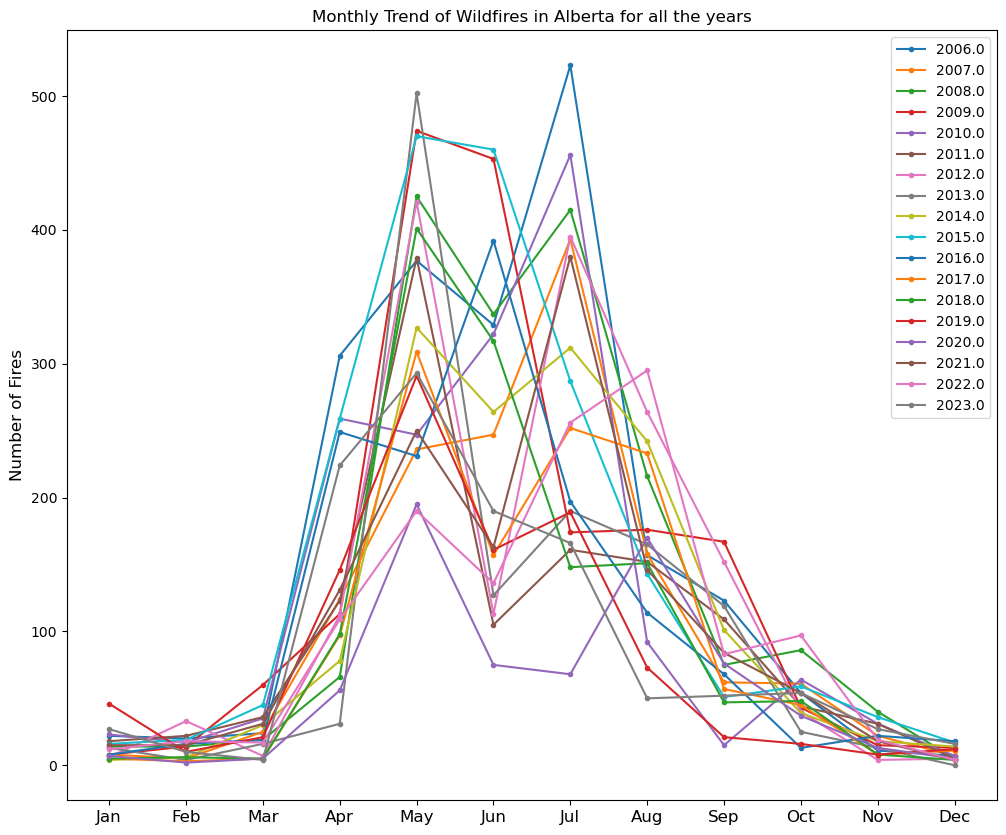

In [13]:
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize = (12,10))
plt.title('Monthly Trend of Wildfires in Alberta for all the years', fontsize = 12)
#plt.xlabel('Months',  fontsize = 12)
plt.ylabel('Number of Fires', fontsize = 12)
plt.xticks(t2pivot.index, month_names, fontsize = 12)


for i in range(len(t2pivot.columns)):
    plt.plot(t2pivot.index.values, t2pivot.iloc[:, i].values, marker='.') # label= str(t1p.iloc[i]))
plt.legend(t2pivot.columns.values)

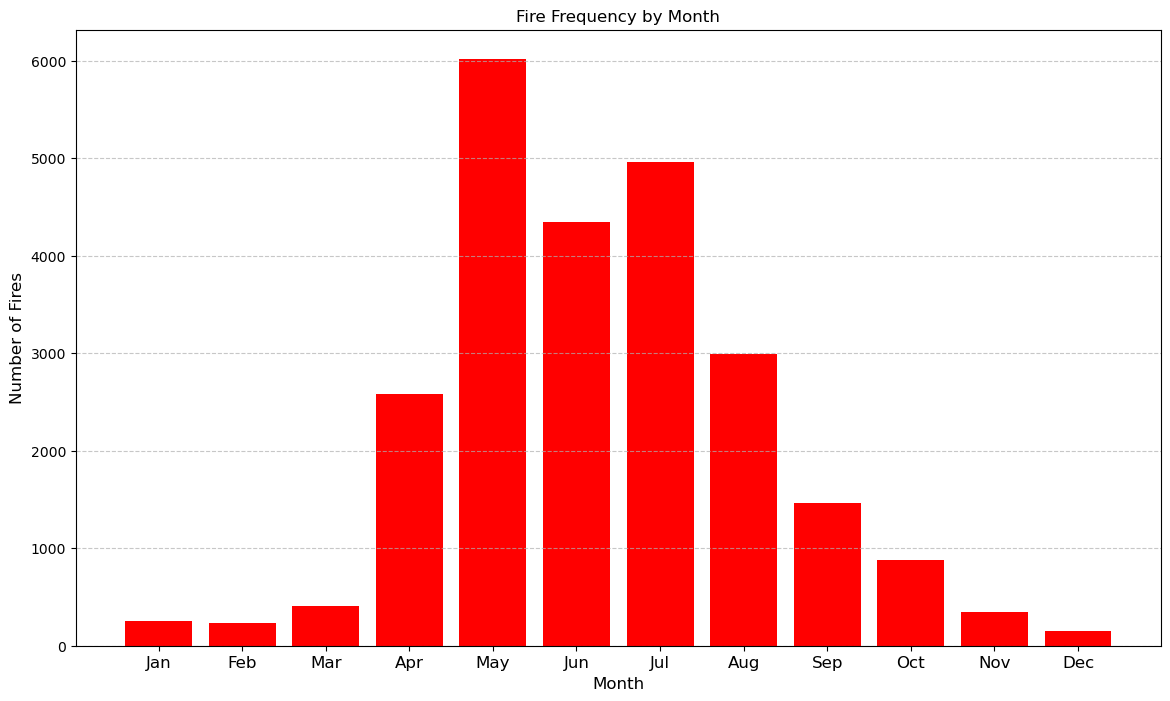

In [14]:
fire_counts_by_month = df['month'].value_counts().sort_index()

plt.figure(figsize=(14, 8))
plt.bar(fire_counts_by_month.index, fire_counts_by_month.values, color='red')
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Number of Fires', fontsize = 12)
plt.title('Fire Frequency by Month', fontsize = 12)
plt.xticks(fire_counts_by_month.index, month_names , fontsize = 12)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Analysis: Through the line chart, it can be observed that the number of wildfires generally reaches its peak in May, while in some years, July is the peak, and the number of wildfires from November to March is very low. From the bar chart, it can be seen that May is the month with the most frequent occurrence of wildfires, with about 6000 incidents in the past 18 years. Overall, May to July is the period with the most frequent wildfires, while December to February has relatively fewer fires.

### What are the Primary causes for Wildfires in Alberta ?

Unique causes: ['Resident' 'Incendiary' 'Other Industry' 'Undetermined' 'Forest Industry'
 'Lightning' 'Recreation' 'Restart' 'Oil & Gas Industry'
 'Power Line Industry' 'Railroad' 'Prescribed Fire' 'Agriculture Industry'
 'Government' 'Under Investigation']


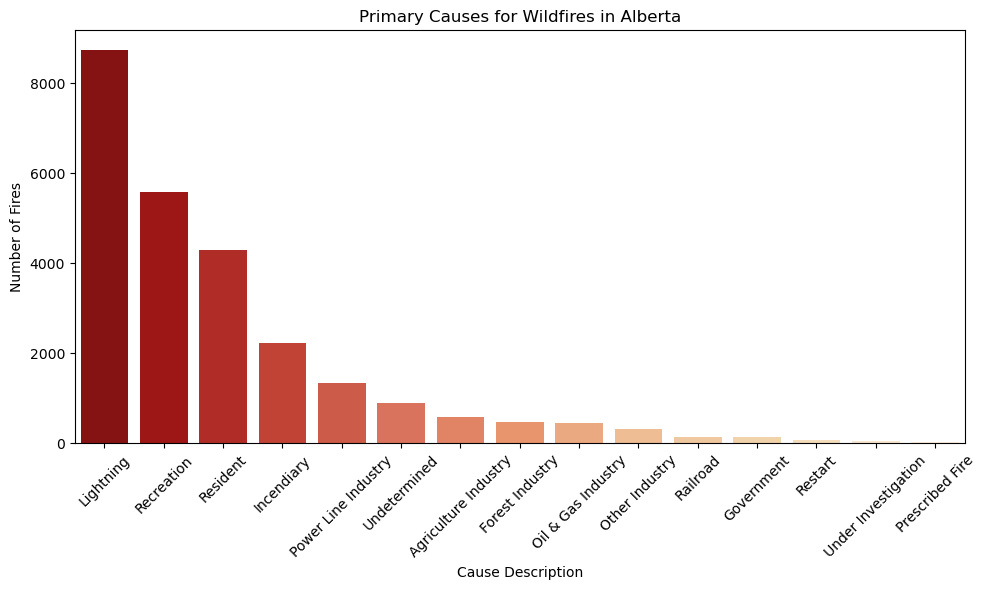

In [15]:
causes = df['general_cause_desc'].unique()
print("Unique causes:", causes)

cause_counts = df['general_cause_desc'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=cause_counts.index, y=cause_counts.values, palette='OrRd_r')
plt.title('Primary Causes for Wildfires in Alberta')
plt.xlabel('Cause Description')
plt.ylabel('Number of Fires')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

Analysis: The bar chart shows the number of fires caused by different factors, with lightning and recreation being the main causes, followed by resident and incendiary. Agriculture, the wire industry, and other industries also contribute to the number of fires, while reasons such as railroad and government are less important.

### Any differences in characteristics of wildfires started by natural causes vs. human activity?

In [16]:
natural_causes = ['Lightning']  
human_causes = ['Resident', 'Incendiary', 'Other Industry' , 'Forest Industry' 'Recreation' , 'Oil & Gas Industry','Power Line Industry' 'Railroad' , 'Agriculture Industry',
 'Government']  
df1 = pd.read_csv('merged_file.csv')

df1['cause_type'] = df1['general_cause_desc'].apply(
    lambda x: "Natural" if x in natural_causes else "Human" if x in human_causes else "Other"
)

df1= df1[df1['cause_type'] != "Other"]

df1['fire_start_date'] = pd.to_datetime(df1['fire_start_date'])
df1['month_name'] = df1['fire_start_date'].dt.month_name()

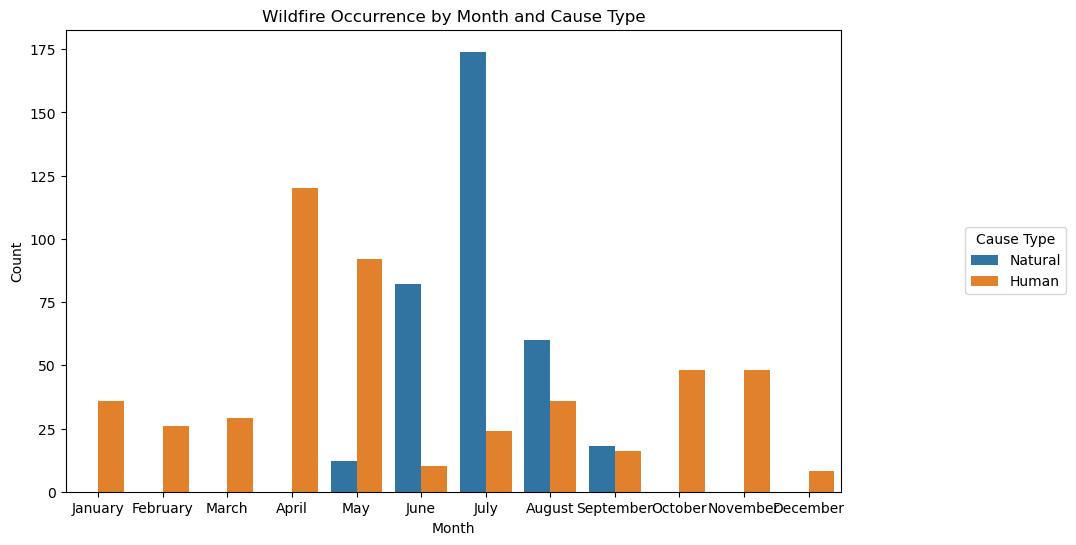

In [17]:
#Analyze the month in which the fire occurred
plt.figure(figsize=(10, 6))
sns.countplot(
    x='month_name', 
    hue='cause_type',  
    data=df1, 
    order=['January', 'February', 'March', 'April', 'May', 'June', 
           'July', 'August', 'September', 'October', 'November', 'December']) 
 
plt.title("Wildfire Occurrence by Month and Cause Type")
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend(title="Cause Type", bbox_to_anchor=(1.3, 0.5), loc='center right')
plt.show()


C:\Users\riyac\AppData\Local\Temp\ipykernel_7476\2565510363.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_distribution = df1.groupby(['cause_type', 'size_bin']).size().unstack()


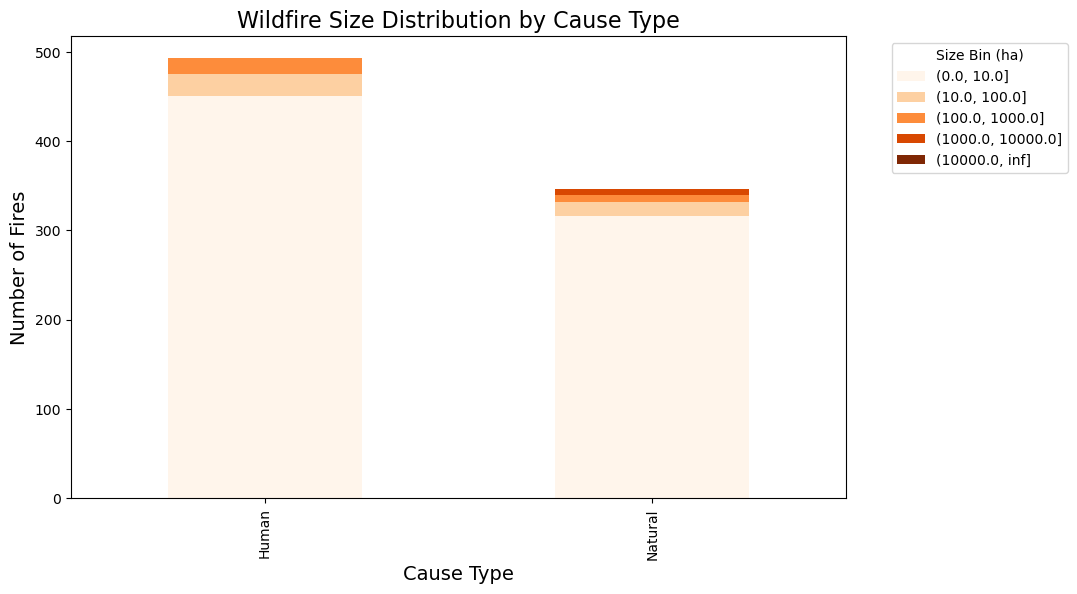

In [18]:
#Divide the scale of the fire into intervals
df1['size_bin'] = pd.cut(df1['current_size'], bins=[0, 10, 100, 1000, 10000, float('inf')])

size_distribution = df1.groupby(['cause_type', 'size_bin']).size().unstack()

#Draw stacked bar chart
size_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Oranges')
plt.title("Wildfire Size Distribution by Cause Type", fontsize=16)
plt.xlabel("Cause Type", fontsize=14)
plt.ylabel("Number of Fires", fontsize=14)
plt.legend(title='Size Bin (ha)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

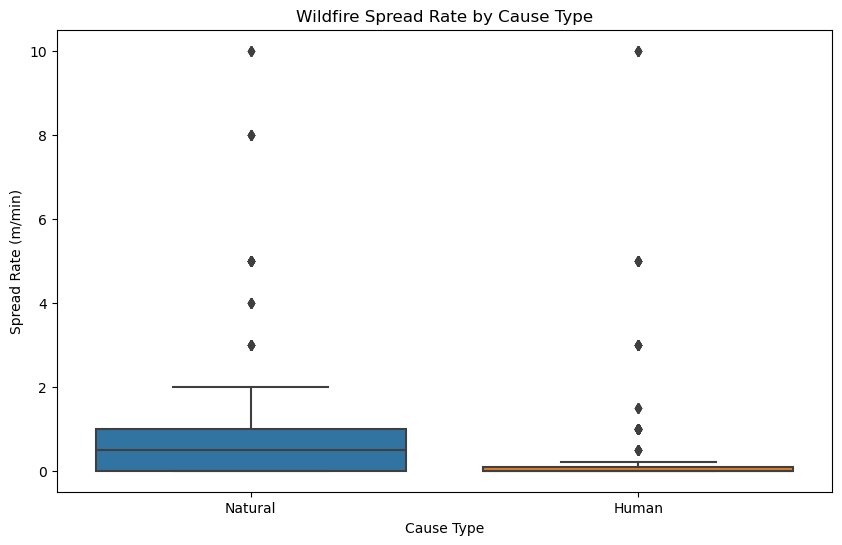

In [19]:
#Analyze the spread rate of fire
plt.figure(figsize=(10, 6))
sns.boxplot(x='cause_type', y='fire_spread_rate', data=df1)
plt.title("Wildfire Spread Rate by Cause Type")
plt.xlabel("Cause Type")
plt.ylabel("Spread Rate (m/min)")
plt.show()


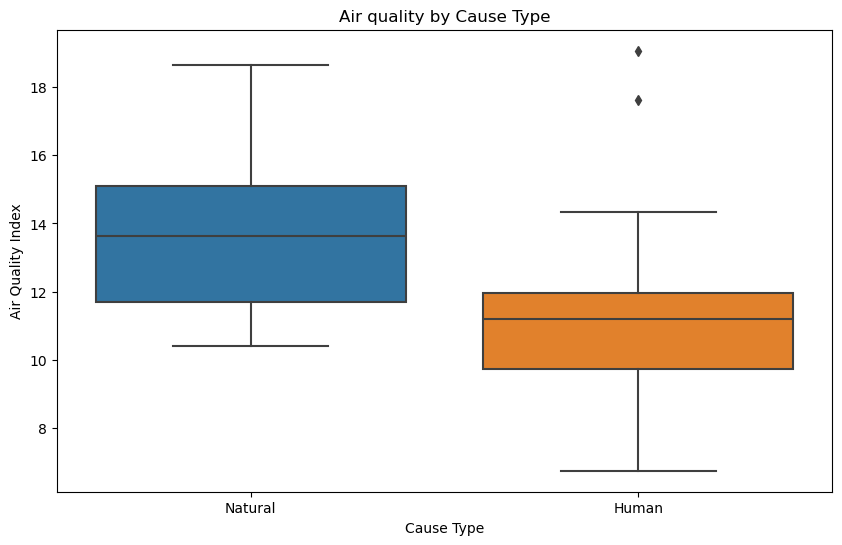

In [20]:
# Analyze air quality
df1 = df1[
    (df1['Parameter'] == 'Air Quality Index') & 
    (df1['Station Name'] == 'Calgary Central')
]
plt.figure(figsize=(10, 6))
sns.boxplot(x='cause_type', y='Average Daily Value', data=df1)
plt.title("Air quality by Cause Type")
plt.xlabel("Cause Type")
plt.ylabel("Air Quality Index")
plt.show()

Analysis: The number of fires caused by natural factors reaches its peak in July, while the number of fires caused by human factors is highest in April. Overall, there are significant differences in the number of fires caused by natural and human factors across different months. Natural cause fires are mainly concentrated from May to September in summer, with almost no occurrence at other times, while human caused fires occur every month. The number of human-made fires is higher than natural fires, but natural fires are more likely to cause large-scale fires and have a faster average spread rate, with a greater impact on air quality.


### How do weather conditions affect the size and spread of wildfires?

Text(0.5, 1.0, 'Temperature vs Fire Size')

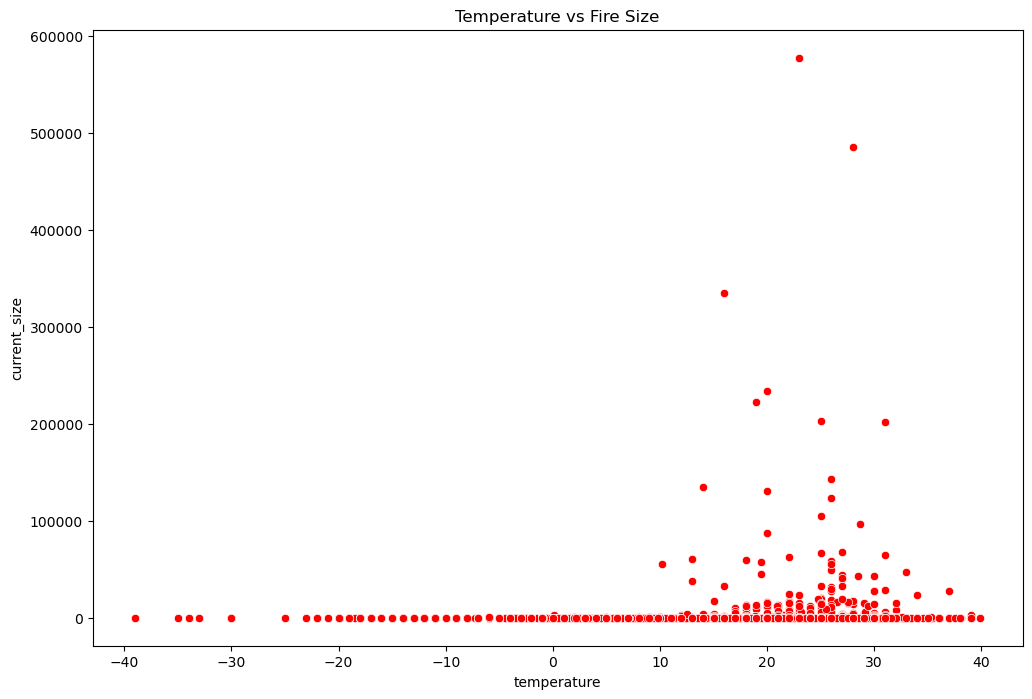

In [21]:
# Scatter Plots to visualize the relationship between weather conditions and fire metrics
plt.figure(figsize=(12, 8))

# Temperature vs Fire Size
sns.scatterplot(x='temperature', y='current_size', data=df, color='red')
plt.title('Temperature vs Fire Size')



Large fires occur when the temperature exceeds 10 degrees Celsius, while super large fires occur when the temperature is between 20-30 degrees Celsius.

Text(0.5, 1.0, 'Relative Humidity vs Fire Size')

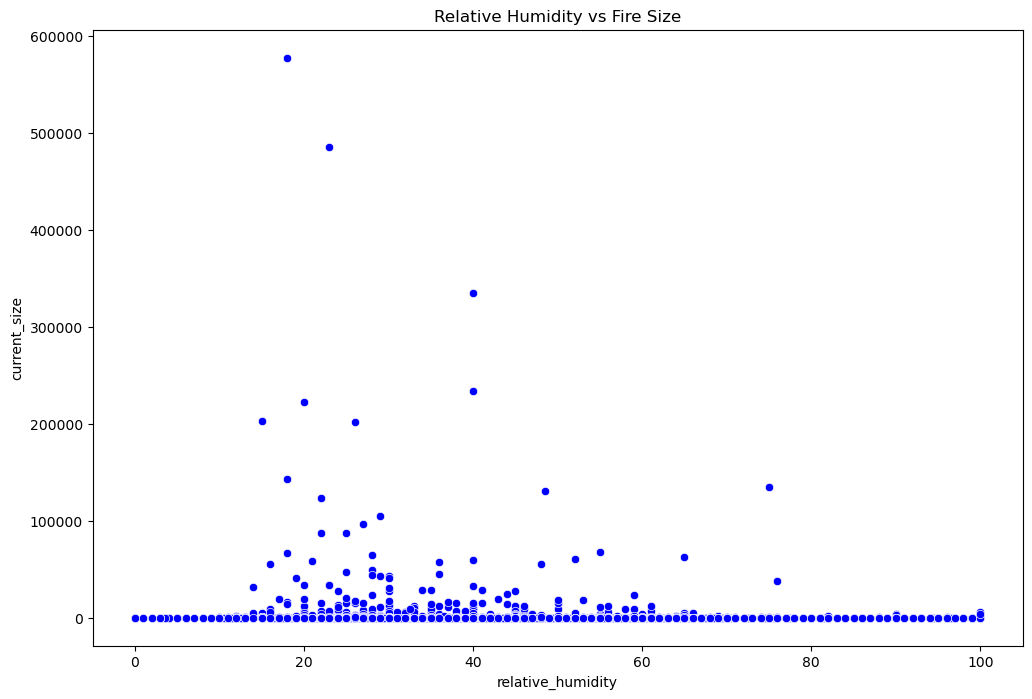

In [22]:
plt.figure(figsize=(12, 8))
# Relative Humidity vs Fire Size
sns.scatterplot(x='relative_humidity', y='current_size', data=df, color='blue')
plt.title('Relative Humidity vs Fire Size')


Large scale fires generally occur between 20% -80% humidity, while super large fires have humidity levels of 20% -40%.

Text(0.5, 1.0, 'Wind Speed vs Fire Size')

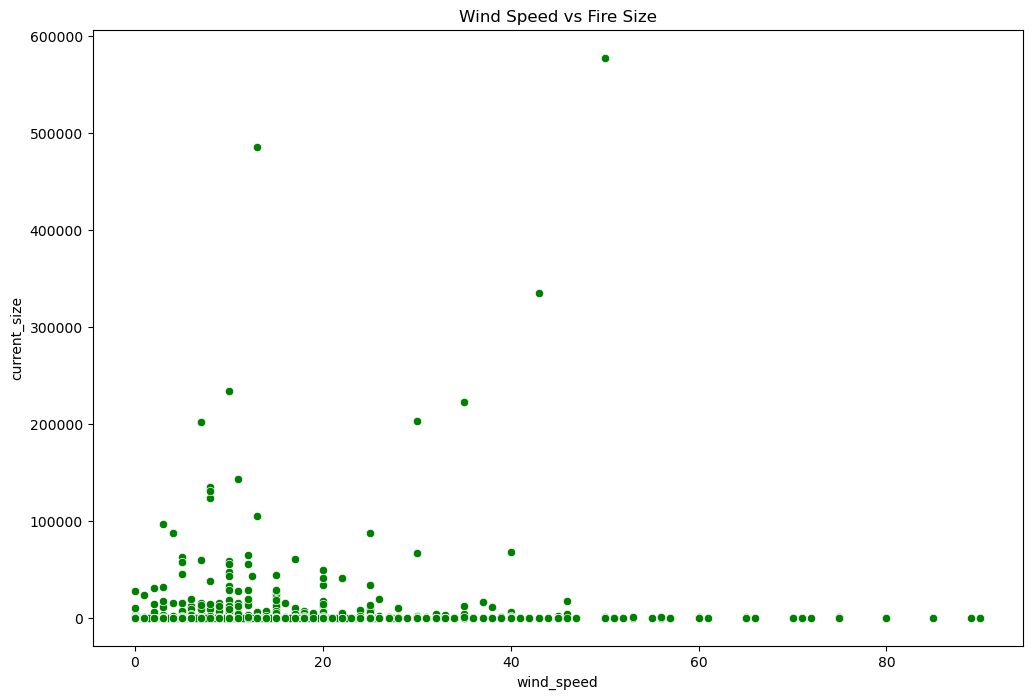

In [23]:
plt.figure(figsize=(12, 8))
# Wind Speed vs Fire Size
sns.scatterplot(x='wind_speed', y='current_size', data=df, color='green')
plt.title('Wind Speed vs Fire Size')

When a large fire occurs, the wind speed is mostly between 10-50(km/h).

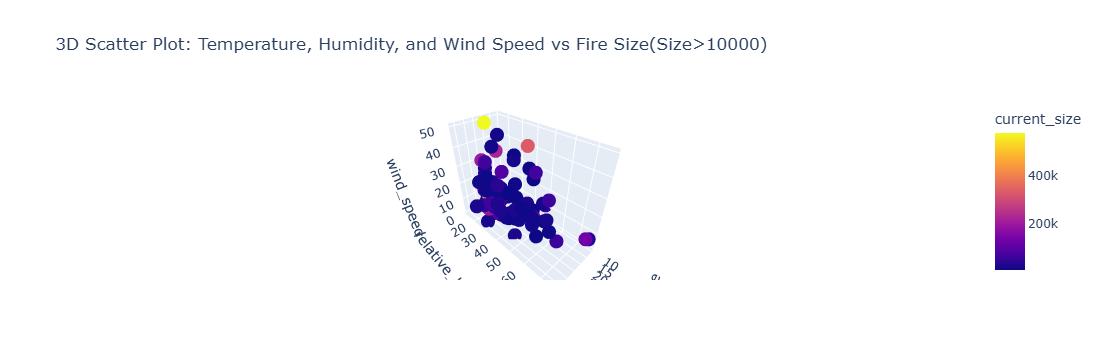

In [25]:
import plotly.express as px
df_filtered = df[df['current_size'] > 10000]

fig_3d = px.scatter_3d(
    df_filtered,  
    x='temperature',
    y='relative_humidity',
    z='wind_speed',
    color='current_size',  
    title='3D Scatter Plot: Temperature, Humidity, and Wind Speed vs Fire Size(Size>10000)'
)
fig_3d.show()

Analysis: When the temperature is between 20-30 degree Celsius, the relative humidity is between 20-40%, and the wind speed is between 10-50km/h, it is more likely to cause large-scale wildfires.

Text(0, 0.5, 'Fire Spread Rate')

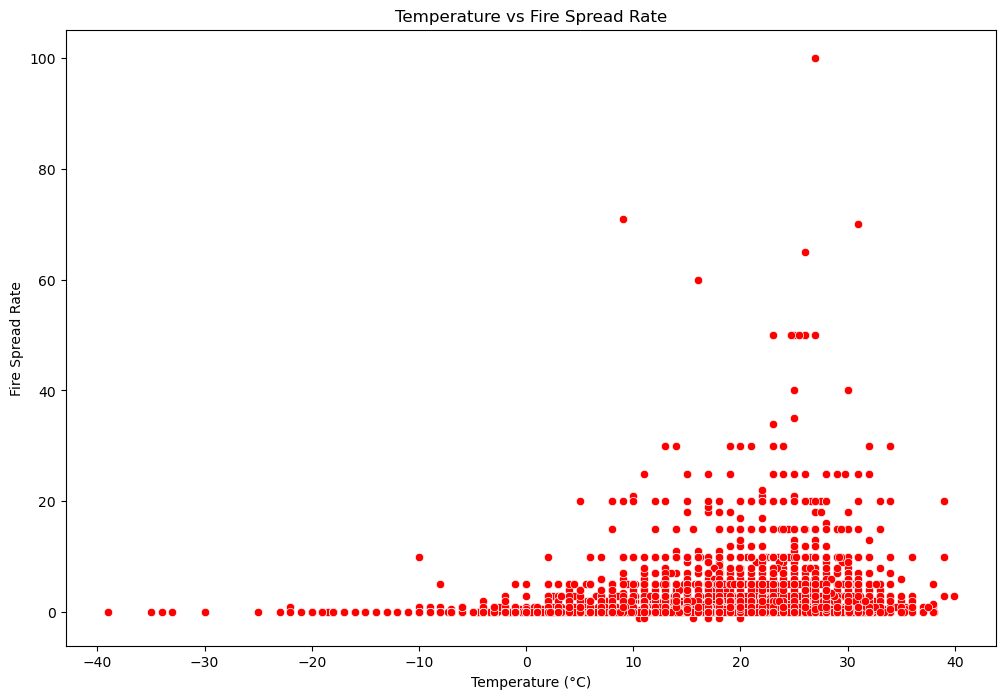

In [26]:
# Scatter Plots to visualize the relationship between weather conditions and fire metrics
# Temperature vs Fire Spread Rate
plt.figure(figsize=(12, 8))
sns.scatterplot(x='temperature', y='fire_spread_rate', data=df, color='red')
plt.title('Temperature vs Fire Spread Rate')
plt.xlabel('Temperature (°C)')
plt.ylabel('Fire Spread Rate')


Text(0, 0.5, 'Fire Spread Rate')

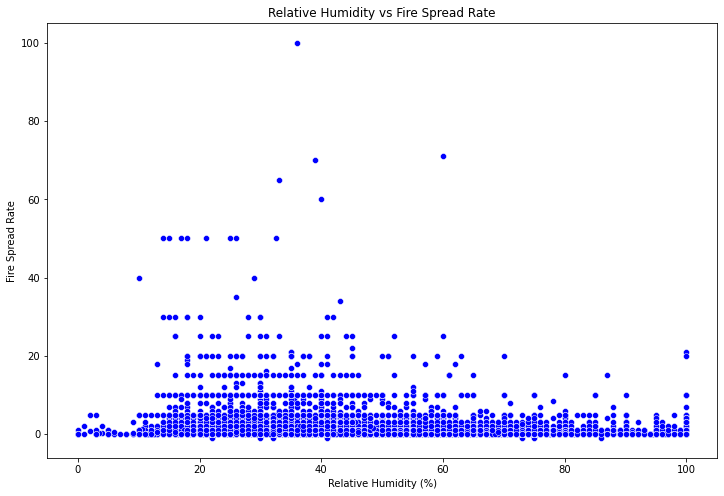

In [25]:
#  Relative Humidity vs Fire Spread Rate
plt.figure(figsize=(12, 8))
sns.scatterplot(x='relative_humidity', y='fire_spread_rate', data=df, color='blue')
plt.title('Relative Humidity vs Fire Spread Rate')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Fire Spread Rate')


Text(0, 0.5, 'Fire Spread Rate')

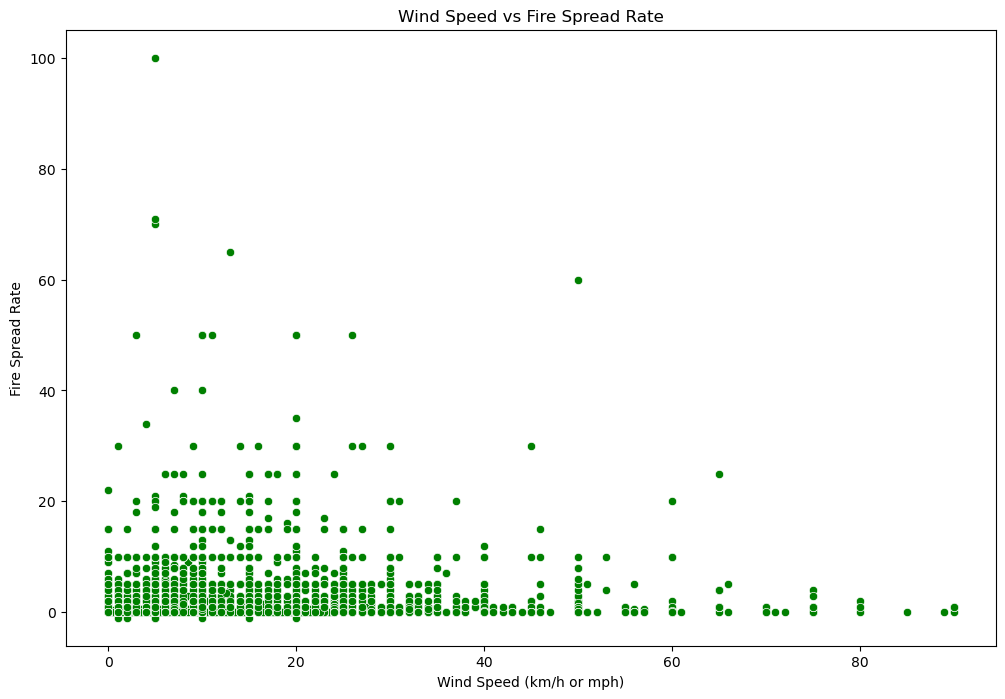

In [27]:
#  Wind Speed vs Fire Spread Rate
plt.figure(figsize=(12, 8))
sns.scatterplot(x='wind_speed', y='fire_spread_rate', data=df, color='green')
plt.title('Wind Speed vs Fire Spread Rate')
plt.xlabel('Wind Speed (km/h or mph)')
plt.ylabel('Fire Spread Rate')


### What are the Charecteristics of large impact fires ?

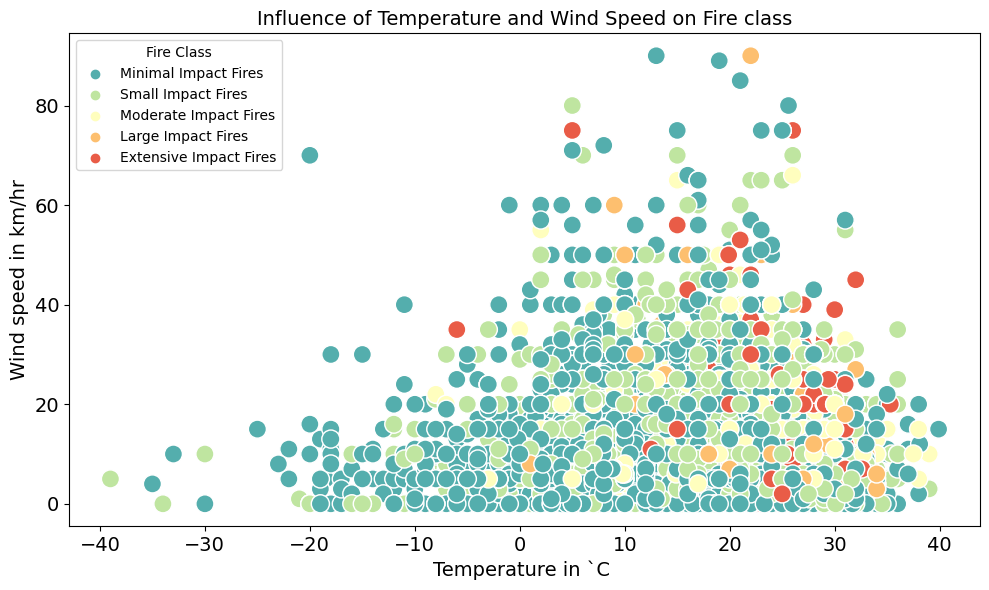

In [28]:
fire_class_order = [
    'Minimal Impact Fires',
    'Small Impact Fires',
    'Moderate Impact Fires',
    'Large Impact Fires',
    'Extensive Impact Fires']


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, y='wind_speed', x='temperature', hue='fire_class', palette= 'Spectral_r', hue_order= fire_class_order, s=170)
plt.title('Influence of Temperature and Wind Speed on Fire class', fontsize = 14)
plt.ylabel('Wind speed in km/hr', fontsize = 14)
plt.xlabel('Temperature in `C ', fontsize = 14)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.legend(title='Fire Class')
plt.tight_layout()
plt.show()

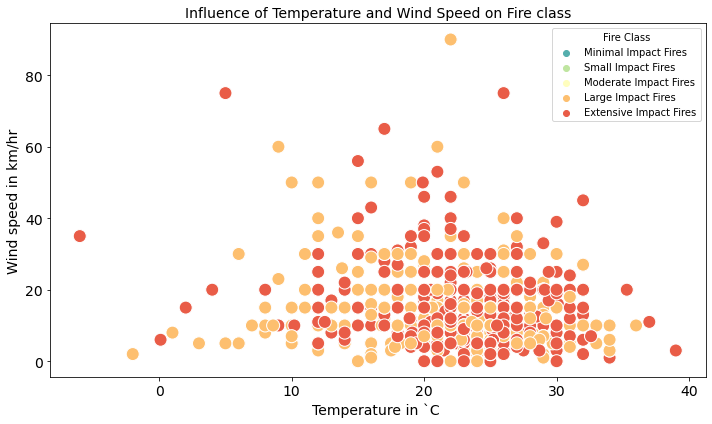

In [69]:
df_big_impact_fires = df[(df['fire_class'] == 'Extensive Impact Fires') | (df['fire_class'] == 'Large Impact Fires')]
#df_big_impact_fires.shape

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_big_impact_fires, y='wind_speed', x='temperature', hue='fire_class', palette= 'Spectral_r', hue_order= fire_class_order, s=170)
plt.title('Influence of Temperature and Wind Speed on Fire class', fontsize = 14)
plt.ylabel('Wind speed in km/hr', fontsize = 14)
plt.xlabel('Temperature in `C ', fontsize = 14)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.legend(title='Fire Class')
plt.tight_layout()
plt.show()

Analysis:  Most of the large impact fires occur when the temperature is between 20 and 30 C and windspeed is between 0 and 40 km per hr

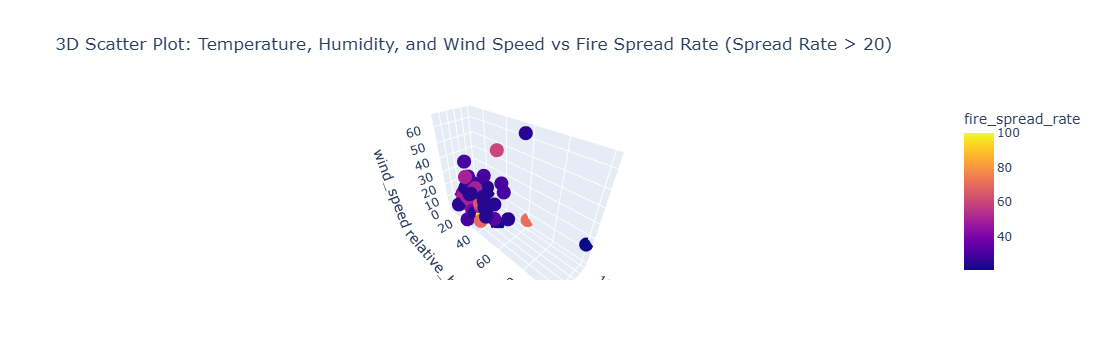

In [29]:
import plotly.express as px
df_filtered = df[df['fire_spread_rate'] > 20]

fig_3d = px.scatter_3d(
    df_filtered,  
    x='temperature',
    y='relative_humidity',
    z='wind_speed',
    color='fire_spread_rate',  
    title='3D Scatter Plot: Temperature, Humidity, and Wind Speed vs Fire Spread Rate (Spread Rate > 20)'
)

fig_3d.show()

Analysis:When the temperature is between 10-30 degrees, the relative humidity is between 20-60%, and the wind speed is between 0-40km/h, the spread rate of fire is faster.

### What is the impact of wildfires on air quality in Calgary？

In [30]:
df2 = pd.read_csv("Historical_Air_Quality_20250130.csv")  
df2 = df2[
    (df2['Parameter'] == 'Air Quality Index') & 
    (df2['Station Name'] == 'Calgary Central')
]
not_in_df = df2[~df2['Date'].isin(df['fire_start_date'])]

not_in_df.to_csv("not_in_df.csv", index=False)
df_unique = pd.read_csv("not_in_df.csv")

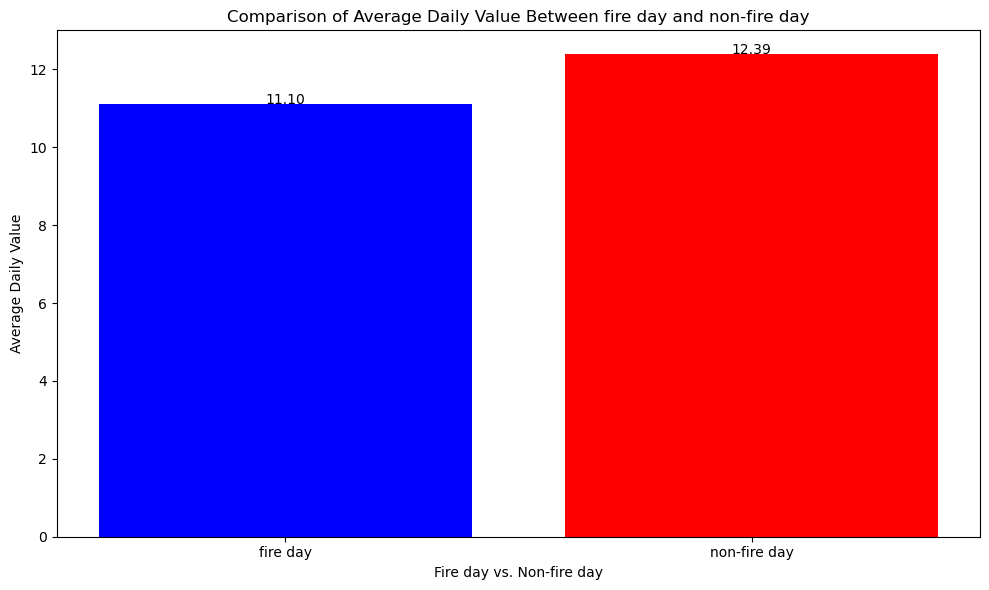

In [163]:

avg_df_unique = df_unique['Average Daily Value'].mean()
avg_df1 = df1['Average Daily Value'].mean()
 
labels = ['fire day', 'non-fire day']
averages = [avg_df_unique, avg_df1]
 
plt.figure(figsize=(10, 6))
plt.bar(labels, averages, color=['blue', 'red'])
 
plt.title('Comparison of Average Daily Value Between fire day and non-fire day')
plt.xlabel('Fire day vs. Non-fire day')
plt.ylabel('Average Daily Value')
 
for index, value in enumerate(averages):
    plt.text(index, value , f'{value:.2f}', ha='center')  
 
plt.tight_layout()
plt.show()

 Analysis: The air quality index on the day of the fire was 1.29 higher than when there was no fire.

### How does the type of vegetation affect the wildfires?

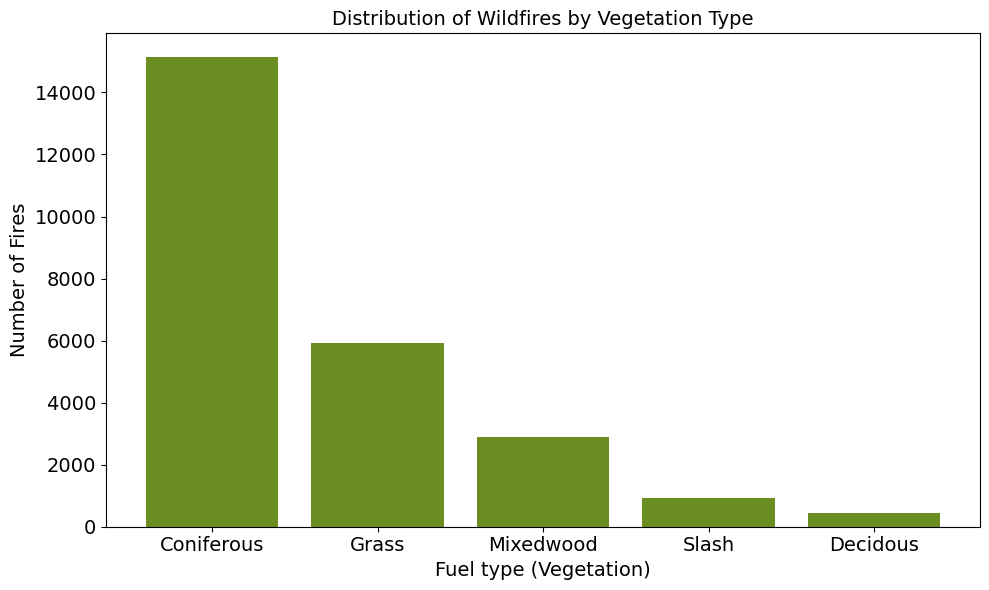

In [31]:

vegetation = df['fuel_type'].unique()
#print("Unique fuel types:", vegetation)

vegetation_counts = df['fuel_type'].value_counts()
vegetation_counts
vegetation_counts.values
vegetation_counts.index



plt.figure(figsize=(10, 6))
plt.bar(vegetation_counts.index, vegetation_counts.values, color = 'olivedrab')
plt.title('Distribution of Wildfires by Vegetation Type', fontsize = 14)
plt.xlabel('Fuel type (Vegetation)', fontsize = 14)
plt.ylabel('Number of Fires', fontsize = 14)
plt.xticks(vegetation_counts.index, fontsize = 14) 
plt.yticks(fontsize = 14)
plt.tight_layout()  
plt.show()

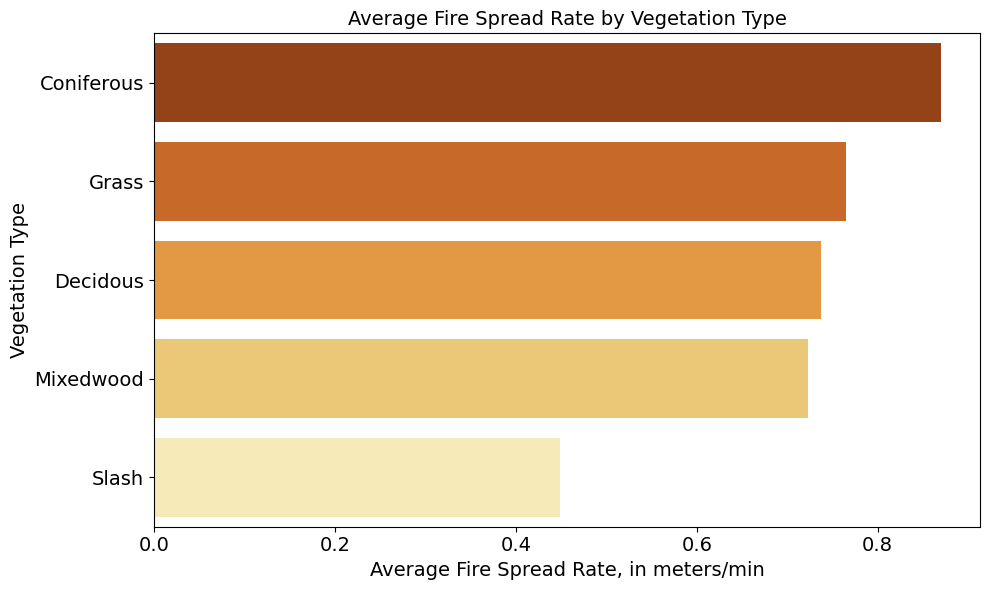

In [32]:
summary_fuel_type = df.groupby('fuel_type').agg({'fire_spread_rate': 'mean'}).reset_index()
sorted_fuel = summary_fuel_type.sort_values(by='fire_spread_rate', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='fire_spread_rate', y='fuel_type', data=sorted_fuel, palette = "YlOrBr_r")
plt.title('Average Fire Spread Rate by Vegetation Type', fontsize =14)
plt.xlabel('Average Fire Spread Rate, in meters/min',fontsize =14 )
plt.ylabel('Vegetation Type', fontsize =14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.tight_layout()
plt.show()



###### Yearly Trend of  Frequency of WildFires in Alberta


C:\Users\riyac\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\riyac\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



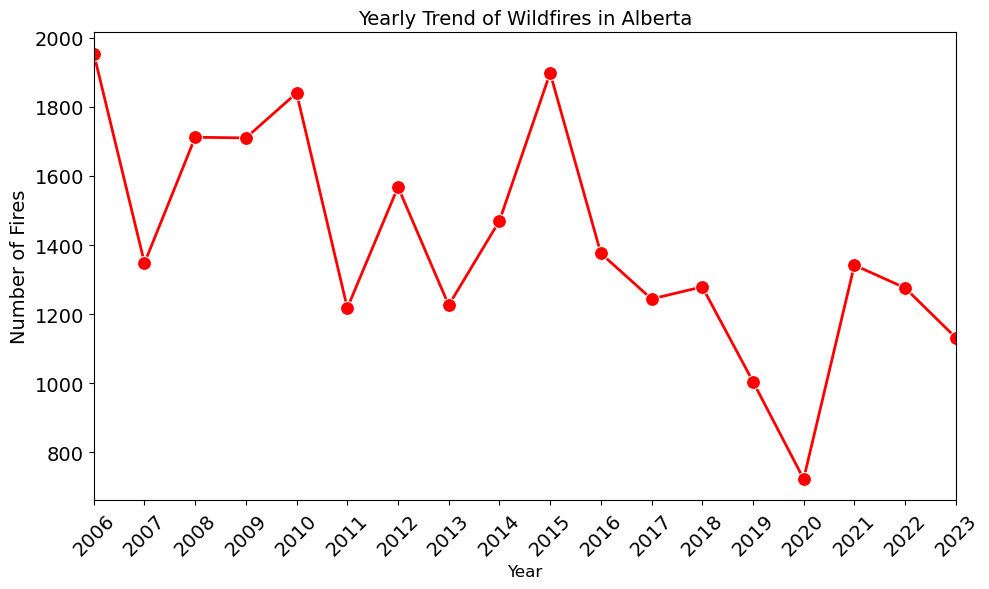

In [33]:
years = df['fire_year'].unique()
#print("Unique years:", years)

fire_counts = df['fire_year'].value_counts()

plt.figure(figsize=(10, 6))
sns.lineplot(x=fire_counts.index, y=fire_counts.values, color='red', linewidth = 2 , marker = 'o', markersize = 10)
plt.title('Yearly Trend of Wildfires in Alberta', fontsize = 14)
plt.xlabel('Year',  fontsize = 12)
plt.ylabel('Number of Fires', fontsize = 14)
plt.xticks(fire_counts.index, fontsize = 14, rotation = 45)
plt.yticks(fontsize = 14)
plt.xlim(2006, 2023)
#plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  
plt.show()

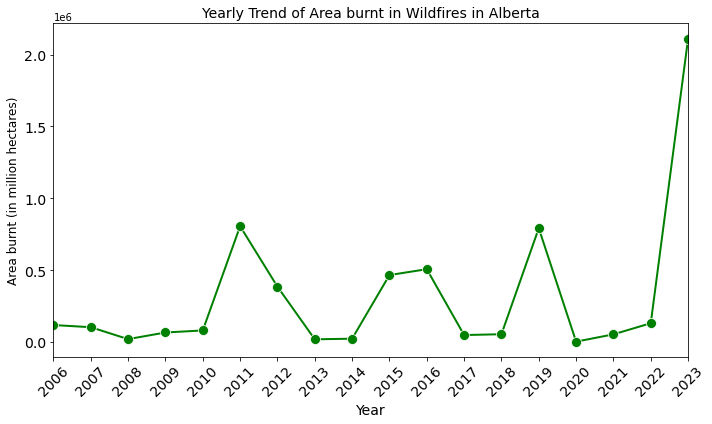

In [65]:
hectares_burnt_by_year = df.groupby('fire_year').agg({'ex_hectares': 'sum'}).reset_index()
#display(hectares_burnt_by_year)

plt.figure(figsize=(10, 6))
sns.lineplot(x='fire_year', y='ex_hectares', data=hectares_burnt_by_year, color='green', linewidth=2, marker='o', markersize=10)
plt.title('Yearly Trend of Area burnt in Wildfires in Alberta', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Area burnt (in million hectares)', fontsize=12)
plt.xticks(hectares_burnt_by_year['fire_year'], fontsize=14, rotation=45)
plt.yticks(fontsize = 14)
plt.xlim(2006, 2023)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Analysis: 

We have observed a decrease in the number of fires since 2015. However, there is no consistent trend in the total hectares of land burnt each year. Notably, in 2023, the total area burnt reached its highest point within the studied period, with around 2 million hectares affected. To put this in perspective, that's equivalent to 20,000 square kilometers. Considering Calgary's area is 825 square kilometers, this means an area roughly the size of 25 Calgarys was burnt.
 

### Correlation Analysis

Correlation Matrix:
                     Average Daily Value  current_size  fire_spread_rate  \
Average Daily Value             1.000000     -0.038900         -0.107986   
current_size                   -0.038900      1.000000          0.179394   
fire_spread_rate               -0.107986      0.179394          1.000000   
temperature                     0.362144      0.055425          0.036901   
relative_humidity              -0.327616      0.046731         -0.096141   
wind_speed                      0.206192      0.158781          0.159043   

                     temperature  relative_humidity  wind_speed  
Average Daily Value     0.362144          -0.327616    0.206192  
current_size            0.055425           0.046731    0.158781  
fire_spread_rate        0.036901          -0.096141    0.159043  
temperature             1.000000          -0.348343    0.057680  
relative_humidity      -0.348343           1.000000   -0.189889  
wind_speed              0.057680          -0.189889

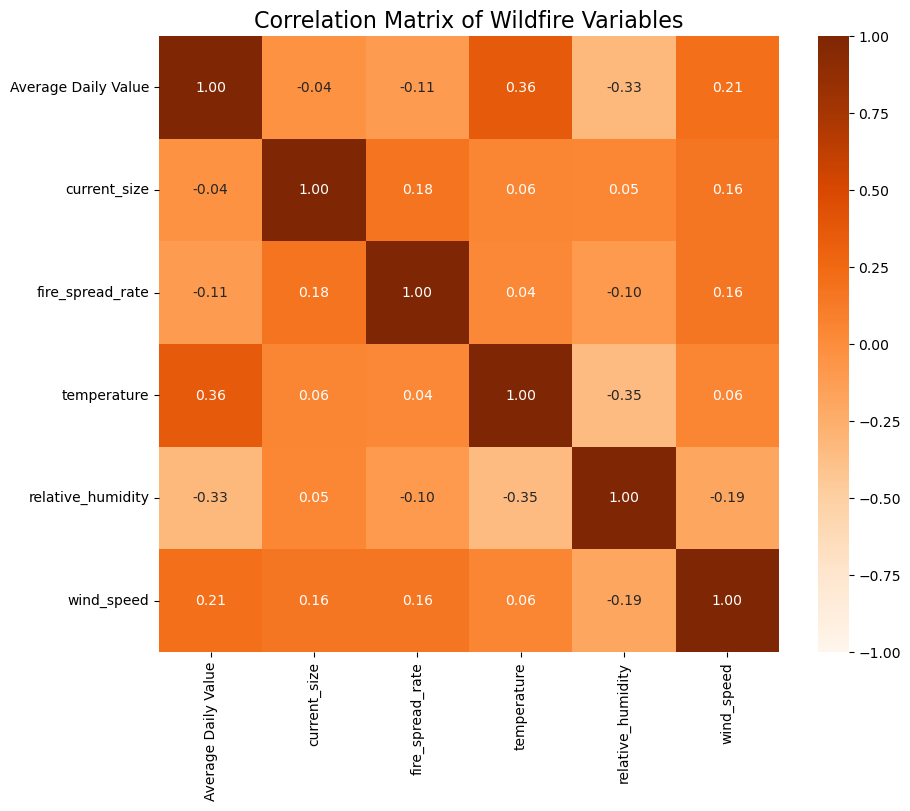

In [80]:
# Correlation Matrix
correlation_matrix = df1[['Average Daily Value','current_size', 'fire_spread_rate', 'temperature', 'relative_humidity', 'wind_speed']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 8)) 
sns.heatmap(
    correlation_matrix, 
    annot=True,          
    cmap='Oranges',      
    fmt='.2f',           
    vmin=-1,             
    vmax=1               
)


plt.title('Correlation Matrix of Wildfire Variables', fontsize=16)
plt.show()

Analysis: 

The correlation coefficient between fire size and fire spread rate is 0.50, indicating that the faster the fire spread rate, the larger the current fire size may be The correlation coefficient between fire size and relative humidity is -0.35, indicating that the lower the relative humidity, the larger the current fire size may be. The correlation coefficient between fire spread rate and relative humidity is -0.19, indicating that the lower the relative humidity, the faster the current fire spread rate may be.

## Comparision Of Three Period Analysis :

We divided the dataset into 3 subsets - pre-covid, covid and post covid to do further analysis

In [34]:
# Convert 'fire_start_date' to datetime, coercing errors to NaT
df['fire_start_date'] = pd.to_datetime(df['fire_start_date'], errors='coerce')
# Filter data into periods
precovid = df[df['fire_year'] < 2020]
covid = df[(df['fire_year'] >= 2020) & (df['fire_year'] <= 2021)]
postcovid = df[df['fire_year'] > 2021]

# Perform groupby for precovid
precovid_grp = precovid.groupby('general_cause_desc').agg({
    'ex_hectares': ['mean', 'max'],
    'fire_spread_rate': ['mean'],
    'temperature': ['mean'],
    'relative_humidity': ['mean'],
    'wind_speed': ['mean']
}).reset_index()

# Perform groupby for COVID
covid_grp = covid.groupby('general_cause_desc').agg({
    'ex_hectares': ['mean', 'max'],
    'fire_spread_rate': ['mean'],
    'temperature': ['mean'],
    'relative_humidity': ['mean'],
    'wind_speed': ['mean']
}).reset_index()

# Perform groupby for Postcovid
postcovid_grp = postcovid.groupby('general_cause_desc').agg({
    'ex_hectares': ['mean', 'max'],
    'fire_spread_rate': ['mean'],
    'temperature': ['mean'],
    'relative_humidity': ['mean'],
    'wind_speed': ['mean']
}).reset_index()

print("Pre-COVID Analysis:")
display(precovid_grp)

print("\nDuring-COVID Analysis:")
display(covid_grp)

print("\nPost-COVID Analysis:")
display(postcovid_grp)

Pre-COVID Analysis:


general_cause_desc    ex_hectares           fire_spread_rate  \
                                   mean       max             mean   
0   Agriculture Industry      14.979824    2613.0         0.604020   
1        Forest Industry      48.323549   17472.9         0.273057   
2             Government       7.811443     487.2         0.575258   
3             Incendiary     132.747828  222837.2         0.929164   
4              Lightning     266.878770  334772.6         1.344491   
5     Oil & Gas Industry     107.025291   31997.0         0.907143   
6         Other Industry      56.812614   14554.3         0.334470   
7    Power Line Industry     107.187097   87659.4         0.752653   
8        Prescribed Fire      41.151053     720.0         2.884211   
9               Railroad       2.199211      73.0         0.790351   
10            Recreation       1.997585    1516.2         0.223743   
11              Resident       2.582938    1344.8         0.480011   
12               Restart       2.889692      93.4         0.606154   
13   Under Investigation  485123.600000  485123.6        10.000000   
14          Undetermined     993.327725  577646.8         0.853846   

   temperature relative_humidity wind_speed  
          mean              mean       mean  
0    16.312312         41.552764  11.391960  
1     9.177979         44.230570   9.626943  
2    16.428866         43.752577   9.092784  
3    14.787720         38.658897   9.109153  
4    21.643294         51.090180   7.620103  
5    16.658995         39.267196  10.888889  
6    15.292803         43.625000  10.000000  
7    16.409309         42.312312  14.401401  
8    14.073684         29.000000  12.736842  
9    17.950000         31.736842   8.868421  
10   15.760972         43.997054   8.048180  
11   15.444743         41.234666   9.086117  
12   19.193846         44.076923   8.723077  
13   28.000000         23.000000  13.000000  
14   17.120949         38.659574   9.599018


During-COVID Analysis:


general_cause_desc ex_hectares           fire_spread_rate temperature  \
                                mean       max             mean        mean   
0   Agriculture Industry    0.931212     21.90         0.579798   18.251515   
1        Forest Industry    2.134194     29.60         0.454839    9.419355   
2             Government    3.008947     51.80         0.284211   16.389474   
3             Incendiary    2.234407    155.00         0.979661   14.935169   
4              Lightning  101.208177  28011.40         1.199808   22.670633   
5     Oil & Gas Industry    1.820000     47.40         0.596774   16.138710   
6         Other Industry    0.098710      0.50         0.216129   22.045161   
7    Power Line Industry    0.626011     57.57         0.389326   17.421348   
8               Railroad    0.124167      0.50         0.250000   14.333333   
9             Recreation    6.115247   2420.00         0.177263   16.830864   
10              Resident    1.414426    243.79         0.437500   15.117230   
11   Under Investigation  175.000000    175.00         2.000000   29.000000   
12          Undetermined    1.231048     37.00         0.579839   16.723387   

   relative_humidity wind_speed  
                mean       mean  
0          44.161616  10.898990  
1          50.064516   5.806452  
2          44.263158   7.157895  
3          38.406780   9.305085  
4          49.827255   8.681382  
5          37.451613  10.451613  
6          40.645161   9.870968  
7          45.331461  11.471910  
8          38.250000  16.666667  
9          43.044239   8.145062  
10         42.118243   9.201014  
11         27.000000  20.000000  
12         42.524194   9.806452


Post-COVID Analysis:


general_cause_desc  ex_hectares            fire_spread_rate temperature  \
                                 mean        max             mean        mean   
0   Agriculture Industry     7.314066     454.40         0.465934   17.615385   
1        Forest Industry     0.399796       5.40         0.483673    6.402041   
2             Government     0.870435      15.40         0.347826   11.921739   
3             Incendiary     2.293850     150.00         0.788938   13.861062   
4              Lightning  2069.093397  212375.10         1.877236   22.111382   
5     Oil & Gas Industry   135.598158    5089.00         0.992105   16.850000   
6         Other Industry     0.607419       5.20         0.558065   12.809677   
7    Power Line Industry   276.914881   46234.35         0.717857   17.764881   
8               Railroad     3.172500      47.98         0.193750   17.768750   
9             Recreation     1.728920     288.00         0.222869   17.242045   
10              Resident     1.025971      53.20         0.493714   15.189714   
11   Under Investigation  7962.867353  212375.10         2.354902   13.914706   
12          Undetermined     6.036776     200.00         1.002303   16.490461   

   relative_humidity wind_speed  
                mean       mean  
0          42.604396  12.329670  
1          48.816327  14.734694  
2          47.521739   9.347826  
3          42.234513   8.469027  
4          48.350755   7.984321  
5          36.789474  10.973684  
6          43.451613  11.258065  
7          46.285714  11.803571  
8          35.000000   6.125000  
9          42.174716   8.765625  
10         41.920000   9.737143  
11         39.617647  11.313725  
12         41.003289   9.730263

In [35]:
# Create a new column 'period' based on fire_year
def label_period(row):
    if row['fire_year'] < 2020:
        return 'Pre-COVID'
    elif 2020 <= row['fire_year'] <= 2021:
        return 'During-COVID'
    else:
        return 'Post-COVID'

df['period'] = df.apply(label_period, axis=1)

# Calculate total, average, and maximum area burned (ex_hectares) per period
grpexhect = df.groupby('period').agg(
    total=('ex_hectares', 'sum'),
    avg=('ex_hectares', 'mean'),
    max=('ex_hectares', 'max')
).reset_index()

# Set custom order for 'period'
custom_order = ['Pre-COVID', 'During-COVID', 'Post-COVID']
grpexhect['period'] = pd.Categorical(grpexhect['period'], categories=custom_order, ordered=True)

# Sort by the custom order
grpexhect = grpexhect.sort_values('period').reset_index(drop=True)

print("Aggregated Area Burned by Period:")
print(grpexhect)

Aggregated Area Burned by Period:
         period       total         avg       max
0     Pre-COVID  3495697.38  167.675431  577646.8
1  During-COVID    57363.03   27.778707   28011.4
2    Post-COVID  2242448.53  931.249390  212375.1


C:\Users\riyac\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



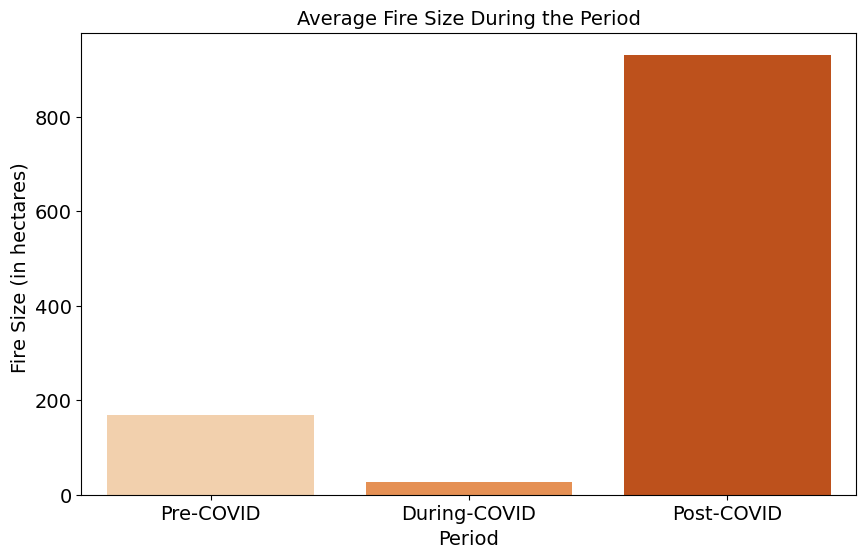

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(data=grpexhect, x='period', y='avg', palette='Oranges')
plt.title("Average Fire Size During the Period",fontsize = 14)
plt.xlabel("Period", fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel("Fire Size (in hectares) ", fontsize = 14)
plt.show()


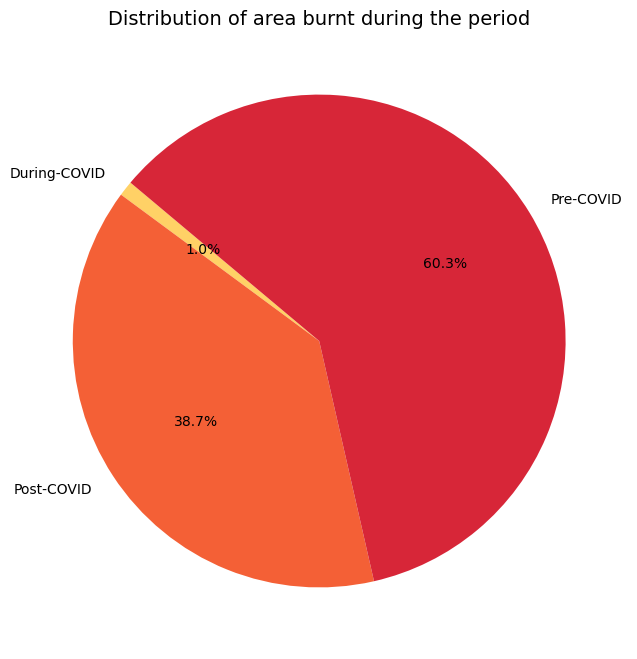

In [37]:
period_impact = df.groupby('period')['ex_hectares'].sum()
plt.figure(figsize=(10, 8))
plt.pie(
    period_impact,
    labels=period_impact.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#FFD166','#F46036','#D72638']
    
)
plt.title('Distribution of area burnt during the period', fontsize = 14)
plt.show()

###  Hypothesis Testing

- We conducted hypothesis testing to compare three periods: pre-COVID, during COVID, and post-COVID. 

In [38]:
# Perform ANOVA test
anova_result = f_oneway(
    precovid['current_size'], 
    covid['current_size'], 
    postcovid['current_size']
)

print("ANOVA Test Results:")
print(f"F-statistic: {anova_result.statistic:.2f}")
print(f"P-value: {anova_result.pvalue:.4f}")

# Interpret the p-value
alpha = 0.05
if anova_result.pvalue < alpha:
    print("Reject the null hypothesis: There is a significant difference in the mean burned area across periods.")
else:
    print("Fail to reject the null hypothesis: No significant difference in the mean burned area across periods.")

ANOVA Test Results:
F-statistic: 18.04
P-value: 0.0000
Reject the null hypothesis: There is a significant difference in the mean burned area across periods.


## Conclusions

#### (1) Fire Occurrence:
- Most fires occur during the month of May, with summer months (May to August) seeing highest  number of fires
    
#### (2) Causes of Fire: 
- Lightening is the leading cause of fires, followed by recreation activity.
    
#### (3) Differences in Fire Characteristics:
- Yes, there are differences in the characteristics of natural fires and human made fires. 
- Fires due to human activity-  spread through out the year while the fires due to natural causes are seasonal and restricted to the summer months.
- The natural fires spread faster and can cause extensive damage in a short period. Also, they have immediate affect on the air quality

#### (4) Weather Conditions:
- Temperature – Most number of fires occur when the temperature is between 10-30 c
- Windspeed – Most number of fires occur when the  wind speed is in the range 0-40 kms/hr
- Humidity – Most number of fires occur when  the relative humidity is 10-40% 

#### (5) Fire Spread rate:
- Fire spreads fastest  when  Temp - 10-30 C, relative humidity- 10-40 % and wind speed is 0-40 km/hr


#### (6) Impact of wildfires on air quality index.
- Air quality index is lower on the days with no fires, indicating better air quality.
 
 
#### (7) Impact of Vegetation
- Coniferous forests, followed by grasslands are more fire-prone. These tree types burn faster –they have higher fire spread rate. 

#### (8) Overall trends in frequency and size:
- There is a downward trend in number of fires since 2015. The trend in size of fire seems to be cyclical. 
- In 2023 2M hectares of  area got burnt in Alberta. This is equivalent to 24 times the size of Calgary


#### (9) Comparison of fires in Pre-covid, covid and Post-covid period
- The average fire size is greatest in the post covid period. This is because the period saw some of most largest fires in the recent times.
- The post covid period(2 years) accounts for about 40% percent of the area that got burnt during the last 18 years.

## Suggestions

To Reduce Frequency and Impact of Forest Fires:

- Implement stricter regulations and monitoring during high-risk months.
- Increase public awareness and education on fire prevention, especially related to recreational activities.
- Enhance early detection and rapid response systems for natural fires.
- Improve forest management practices to reduce fuel load and fire-prone vegetation

## References
[1] https://www.alberta.ca/wildfire-prevention-and-mitigation   <br>
[2] https://www.alberta.ca/alberta-wildfire       <br>
[3] https://open.alberta.ca/opendata/wildfire-data.   <br>
[4]https://globalnews.ca/news/10670403/jasper-alberta-wildfire-conditions-response-experts/   <br>
[5]https://globalnews.ca/news/10653084/mountain-pine-beetles-jasper-wildfires/    <br>
[6]https://globalnews.ca/news/10751657/canada-worst-wildfire-season-how-bad/      <br>
[7] https://globalnews.ca/news/10645096/jasper-alberta-wildfires-july-26/    <br>
[8] McKinney, W. (2022). Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython. 3rd ed. Sebastopol, CA: O'Reilly Media.Python for Data Analysis (3rd edition)
